News classification

In [53]:
from sklearn.datasets import fetch_20newsgroups

In [54]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [55]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [56]:
print (newsgroups_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







Text preprocessing

In [57]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Администратор\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Администратор\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
def preprocess_text(texts):
    stop_words = set(stopwords.words('english'))
    regex = re.compile('[^a-z A-Z]')
    preprocess_texts = []
    for i in range(len(texts)):
        text = texts[i].lower()
        text = regex.sub(' ', text)
        word_tokens = word_tokenize(text) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        preprocess_texts.append( ' '.join(filtered_sentence))
    
    return preprocess_texts

In [59]:
newsgroups_train['preprocess_data'] = preprocess_text(newsgroups_train.data)

In [60]:
newsgroups_train['preprocess_data']

['lerxst wam umd edu thing subject car nntp posting host rac wam umd edu organization university maryland college park lines wondering anyone could enlighten car saw day door sports car looked late early called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please e mail thanks il brought neighborhood lerxst',
 'guykuo carson u washington edu guy kuo subject si clock poll final call summary final call si clock reports keywords si acceleration clock upgrade article shelley qvfo innc organization university washington lines nntp posting host carson u washington edu fair number brave souls upgraded si clock oscillator shared experiences poll please send brief message detailing experiences procedure top speed attained cpu rated speed add cards adapters heat sinks hour usage per day floppy disk functionality floppies especially requested summarizing next two day

In [61]:
newsgroups_test['preprocess_data'] = preprocess_text(newsgroups_test.data)

Stemming

In [62]:
from nltk.stem.lancaster import LancasterStemmer

In [63]:
def stemming_texts(texts):
  st = LancasterStemmer()
  stem_text = []
  for text in texts:
    word_tokens = word_tokenize(text)
    stem_text.append(' '.join([st.stem(word) for word in word_tokens]))
  return stem_text

In [64]:
newsgroups_train['data_stemming'] = \
                           stemming_texts(newsgroups_train.preprocess_data)

In [65]:
newsgroups_test['data_stemming'] = \
                            stemming_texts(newsgroups_test.preprocess_data)

Embedding with 'Bag Of Words'

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
vectorizer = CountVectorizer()

In [68]:
def bow(vectorizer, train, test):
  train_bow = vectorizer.fit_transform(train)
  test_bow = vectorizer.transform(test)
  return train_bow, test_bow  

In [69]:
 # BagOfWords on "train" and "test" data without preprocessing
X_train_bow, X_test_bow = bow(vectorizer, 
                              newsgroups_train.data, 
                              newsgroups_test.data)  

In [70]:
# The array size
X_train_bow.shape

(11314, 130107)

In [71]:
X_test_bow.shape

(7532, 130107)

In [72]:
# BagOfWords on preprocessed data
X_train_bow_preprocess, X_test_bow_preprocess = bow(vectorizer, 
                                                    newsgroups_train.preprocess_data,
                                                    newsgroups_test.preprocess_data)  

In [73]:
X_train_bow_preprocess.shape

(11314, 88863)

In [74]:
X_test_bow_preprocess.shape

(7532, 88863)

In [75]:
# BagOfWords after stemming
X_train_bow_stem, X_test_bow_stem = bow(vectorizer, 
                                        newsgroups_train.data_stemming,
                                        newsgroups_test.data_stemming)

In [76]:
X_train_bow_stem.shape

(11314, 61221)

In [77]:
X_test_bow_stem.shape

(7532, 61221)

Logistic regression for classification (BagOfWords on data after stemming)

In [78]:
from sklearn.metrics import accuracy_score
import numpy as np

In [79]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 1000)

In [80]:
clf.fit(X_train_bow_stem, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_bow_stem),
                      newsgroups_test.target))


LogisticRegression:  0.7966011683483802


Embedding with 'TF-IDF'

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
vectorizer_tf_idf = TfidfVectorizer()

In [83]:
X_train_tfidf_stem, X_test_tfidf_stem = bow(vectorizer_tf_idf,
                                            newsgroups_train.data_stemming,
                                            newsgroups_test.data_stemming)

In [84]:
X_train_tfidf_stem.shape

(11314, 61221)

In [85]:
X_test_tfidf_stem.shape

(7532, 61221)

TF-IDF and N-grams

In [86]:
vectorizer_ngram = TfidfVectorizer(ngram_range=(1,2))

In [87]:
X_train_ngram_stem, X_test_ngram_stem = bow(vectorizer_ngram, 
                                            newsgroups_train.data_stemming,
                                            newsgroups_test.data_stemming)

In [88]:
X_train_ngram_stem.shape

(11314, 934463)

In [89]:
X_test_ngram_stem.shape

(7532, 934463)

Logistic regression for classification (TF-IDF and n-grams)


In [90]:
clf.fit(X_train_ngram_stem, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_ngram_stem), 
                      newsgroups_test.target))



LogisticRegression:  0.8295273499734467


LinearSVC for classification (BagOfWords on data after stemming)

In [91]:
from sklearn.svm import LinearSVC
clf_svc = LinearSVC()

In [96]:
clf_svc.fit(X_train_bow_stem, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_bow_stem),
                      newsgroups_test.target))

LinearSVC:  0.7813329792883696


LinearSVC for classification (TF-IDF and n-grams)

In [93]:
clf_svc.fit(X_train_ngram_stem, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_ngram_stem),
                      newsgroups_test.target))

LinearSVC:  0.8555496548061604


In [94]:
# Confusion matrix will show the texts which the model has mixed up
import seaborn
from sklearn.metrics import confusion_matrix

In [95]:
predict_targets = clf_svc.predict(X_test_ngram_stem)

<AxesSubplot:>

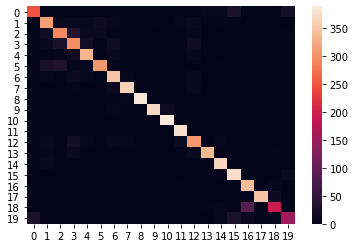

In [97]:
seaborn.heatmap(confusion_matrix(newsgroups_test.target, predict_targets))  

In [98]:
newsgroups_test.target_names[18]

'talk.politics.misc'

In [99]:
newsgroups_test.target_names[16]

'talk.politics.guns'